In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

In [40]:
import googletrans
from googletrans import Translator

In [41]:
from fuzzywuzzy import process

## Data Loading and Cleaning

In [42]:
item=pd.read_csv('items.csv')
item.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [43]:
item.item_category_id.nunique()

84

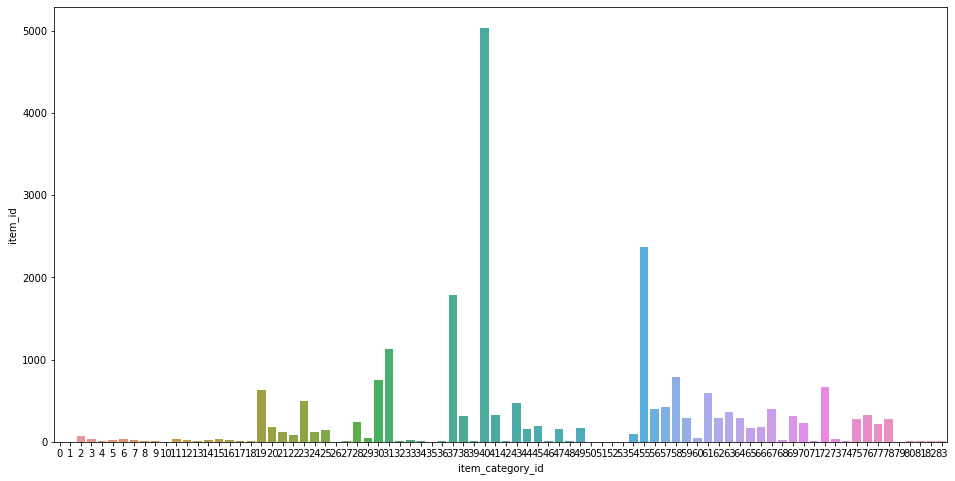

In [44]:
#plot how many items in each category
item_group=item.groupby(['item_category_id'])['item_id'].count().reset_index()
item_group=item_group.sort_values(by='item_category_id',ascending=True)
plt.figure(figsize=(16,8))
sns.barplot(item_group.item_category_id,item_group.item_id)

In [45]:
category=pd.read_csv('item_categories.csv')

In [46]:
translator = Translator()         

In [47]:
category['item_category_name']=category.item_category_name.apply(lambda x: 
                                                                 translator.translate(x, src='ru', dest='en').text)

In [48]:
category.head()

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


In [49]:
shop=pd.read_csv('shops.csv')

In [50]:
shop['shop_name']=shop.shop_name.apply(lambda x: translator.translate(x, src='ru', dest='en').text)

In [51]:
shop.head()

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 francs",0
1,"! Yakutsk TC ""Central"" fran",1
2,"Adygea shopping center ""Mega""",2
3,"Balashikha TRK ""October-Kinomir""",3
4,"Volzhsky shopping center ""Volga Mall""",4


In [52]:
item_info=item.merge(category,on='item_category_id')
item_info

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Movie - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Movie - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Movie - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Movie - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Movie - DVD
...,...,...,...,...
22165,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095,83,Batteries
22166,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096,83,Batteries
22167,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097,83,Batteries
22168,Элемент питания КОСМОС LR03 2*BL,22098,83,Batteries


In [53]:
sales=pd.read_csv('sales_train.csv')
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [54]:
#Look for pice outliers and remove the outlier
sales.item_price.sort_values(ascending=False).head(10)

1163158    307980.0
885138      59200.0
1488135     50999.0
2327159     49782.0
2910156     42990.0
2931380     42990.0
2917760     42990.0
2885692     42990.0
1006638     42000.0
2893100     41990.0
Name: item_price, dtype: float64

In [55]:
sales.loc[1163158]

date              13.12.2013
date_block_num            11
shop_id                   12
item_id                 6066
item_price            307980
item_cnt_day               1
Name: 1163158, dtype: object

In [56]:
sales[sales.item_id==6066]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [57]:
item_info[item_info.item_id==6066]

,item_name,item_id,item_category_id,item_category_name
15100,Radmin 3 - 522 лиц.,6066,75,Programs - For Home and Office


In [58]:
item_info[item_info.item_category_id==75]

,item_name,item_id,item_category_id,item_category_name
14900,1С:Смета. Базовая версия,830,75,Programs - For Home and Office
14901,3D GARDEN (Наш Сад 10) (box),1037,75,Programs - For Home and Office
14902,ABBYY FineReader 10 Home Edition Full (коробка),1151,75,Programs - For Home and Office
14903,ABBYY FineReader 11 Professional Edition Full ...,1153,75,Programs - For Home and Office
14904,ABBYY FineReader 12 Professional Edition Full ...,1155,75,Programs - For Home and Office
...,...,...,...,...
15172,Программное обеспечение Хиромантия -CD-(DVD-box),17745,75,Programs - For Home and Office
15173,Русский Дизайн 3.5 (DVD box),18097,75,Programs - For Home and Office
15174,Свободный офис. Вып. 9 для Windows и Linux (bo...,19319,75,Programs - For Home and Office
15175,Сметно-нормативные базы в формате программы 1С...,19381,75,Programs - For Home and Office


In [59]:
item_info=item_info[item_info.item_id!= 6066]
sales=sales[sales.item_price!=307980.0]

In [60]:
#look for sales count outliers
sales['item_cnt_day'].sort_values(ascending=False)[:5]

2909818    2169.0
2326930    1000.0
2864235     669.0
2851091     637.0
2608040     624.0
Name: item_cnt_day, dtype: float64

In [61]:
sales[sales['item_cnt_day'] == 2169]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,28.10.2015,33,12,11373,0.908714,2169.0


In [62]:
item_info[item_info['item_id'] == 11373]
#Delivery to the point of issue(Boxberry),not actual item sales

,item_name,item_id,item_category_id,item_category_name
21966,Доставка до пункта выдачи (Boxberry),11373,9,Delivery of goods


In [63]:
#other record of this item very small item_cnt
sales[sales['item_id'] == 11373].head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
58323,08.01.2013,0,12,11373,1000.0,1.0
58324,31.01.2013,0,12,11373,97.8,5.0
176790,01.02.2013,1,12,11373,229.0,1.0
176791,04.02.2013,1,12,11373,130.0,1.0
302468,29.03.2013,2,12,11373,139.5,2.0


In [64]:
sales=sales[sales.item_cnt_day!=2169.0]

In [65]:
#correct the negative price, fill in with price for other sales of the same item
#sales.loc[484683]
sales[(sales.item_id==2973)&(sales.date=='2013-05-15 00:00:00')]
sales.loc[484683,'item_price']=1249.0

In [66]:
#identify duplicate shops in the dataset
str2Match = shop.shop_name[0]
print(str2Match)
strOptions = list(shop.shop_name[1:])
Ratios = process.extract(str2Match,strOptions)
print(Ratios)
# You can also select the string with the highest matching percentage
highest = process.extractOne(str2Match,strOptions)
print(highest)
#remove shop 57 and 58 are duplicates of shop 1 and 2
sales=sales[~sales.shop_id.isin([57,58])]

! Yakutsk Ordzhonikidze, 56 francs
[('Yakutsk Ordzhonikidze, 56', 95), ('Yakutsk TC "Central"', 86), ('! Yakutsk TC "Central" fran', 53), ('N.Novgorod shopping mall "Fantasy"', 43), ('Kursk TC "Pushkinsky"', 38)]
('Yakutsk Ordzhonikidze, 56', 95)


In [71]:
sales['date']=pd.to_datetime(sales.date)
sales['year_month']=sales['date'].dt.to_period('M')

In [72]:
sales=sales[sales.date<'2015-11-01']

In [69]:
#export cleaned dataframes
#item_info.to_csv('item_info.csv',index=False)
#sales.to_csv('sales_clean.csv',index=False)

In [73]:
store_item_monthly=sales.groupby(['shop_id','item_id','year_month'])['item_cnt_day'].sum().reset_index()
store_item_monthly.head()

,shop_id,item_id,year_month,item_cnt_day
0,0,30,2013-02,31.0
1,0,31,2013-02,11.0
2,0,32,2013-01,4.0
3,0,32,2013-02,6.0
4,0,32,2013-03,2.0


In [74]:
store_item_daily=sales.groupby(['shop_id','item_id','date'])['item_cnt_day'].sum().reset_index()
store_item_daily.head()

,shop_id,item_id,date,item_cnt_day
0,0,30,2013-02-15,2.0
1,0,30,2013-02-16,9.0
2,0,30,2013-02-17,4.0
3,0,30,2013-02-18,4.0
4,0,30,2013-02-20,2.0


In [75]:
store_monthly=sales.groupby(['shop_id','year_month'])['item_cnt_day'].sum().reset_index()
store_monthly.head()

,shop_id,year_month,item_cnt_day
0,0,2013-01,3626.0
1,0,2013-02,3957.0
2,0,2013-03,403.0
3,0,2013-04,473.0
4,0,2013-05,465.0


In [76]:
store_daily=sales.groupby(['shop_id','date'])['item_cnt_day'].sum().reset_index()
store_daily.head()

,shop_id,date,item_cnt_day
0,0,2013-01-02,228.0
1,0,2013-01-13,144.0
2,0,2013-01-14,138.0
3,0,2013-01-15,153.0
4,0,2013-01-16,154.0


In [77]:
company_daily=sales.groupby(['date'])["item_cnt_day"].sum().reset_index()
company_daily.head()

,date,item_cnt_day
0,2013-01-01,1951.0
1,2013-01-02,3817.0
2,2013-01-03,3500.0
3,2013-01-04,2368.0
4,2013-01-05,4662.0


In [78]:
company_monthly=sales.groupby(['year_month'])["item_cnt_day"].sum().reset_index()
company_monthly.head()

,year_month,item_cnt_day
0,2013-01,113903.0
1,2013-02,130610.0
2,2013-03,131621.0
3,2013-04,104586.0
4,2013-05,109274.0


In [79]:
store_item_daily.to_csv('store_item_daily.csv',index=False)
store_item_monthly.to_csv('store_item_monthly.csv',index=False)
store_daily.to_csv('store_daily.csv',index=False)
store_monthly.to_csv('store_monthly.csv',index=False)
company_daily.to_csv('company_daily.csv',index=False)
company_monthly.to_csv('company_monthly.csv',index=False)

## Data Visualization

### Company Level

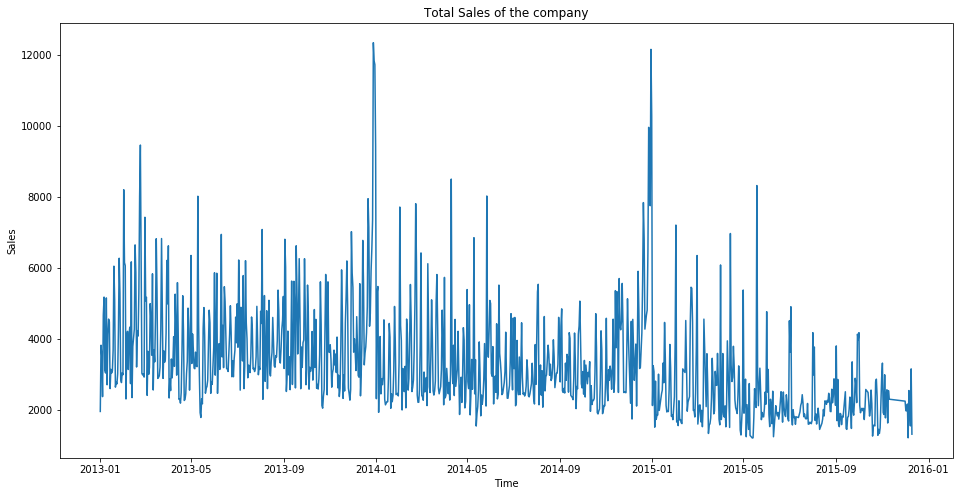

In [67]:
company_daily.set_index('date',inplace=True)
plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts_d);

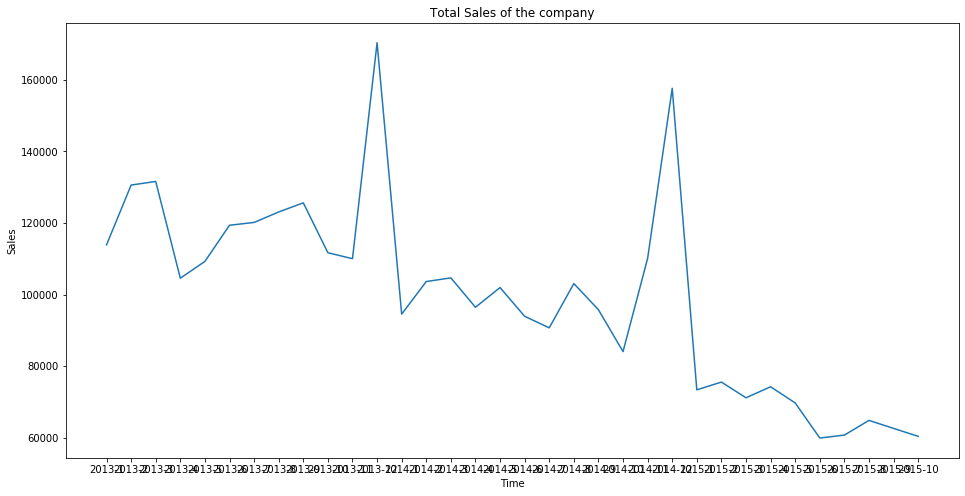

In [79]:
company_monthly['year_month']=company_monthly[['year','month']].apply(lambda x: '-'.join(x.dropna().astype(str)),axis=1)
company_monthly.drop(columns=['year','month'],inplace=True)
company_monthly=company_monthly.set_index('year_month')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(company_monthly);

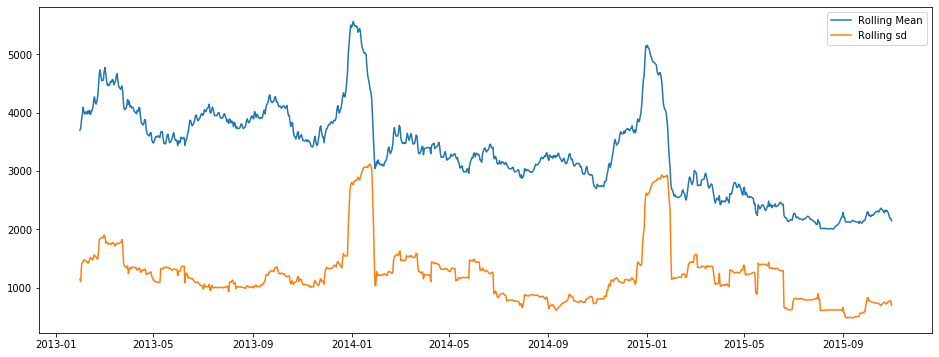

In [83]:
plt.figure(figsize=(16,6))
plt.plot(company_daily.rolling(window=30,center=False).mean(),label='Rolling Mean');
plt.plot(company_daily.rolling(window=30,center=False).std(),label='Rolling sd');
plt.legend();

### Store Level

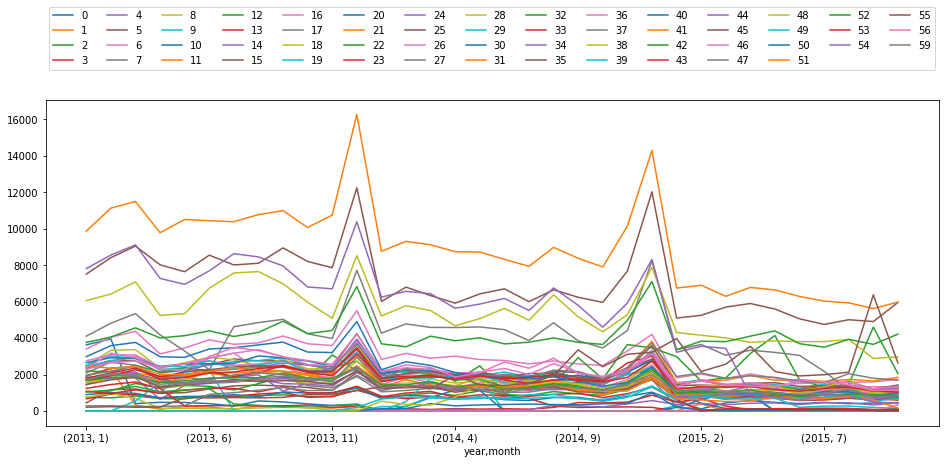

In [69]:
sm_wide=pd.pivot_table(store_monthly,index=['year','month'], columns='shop_id', values='item_cnt_day',
                       aggfunc=np.sum, fill_value=0)
ax=sm_wide.plot(figsize=(16,6))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=15, fancybox=True, shadow=False)

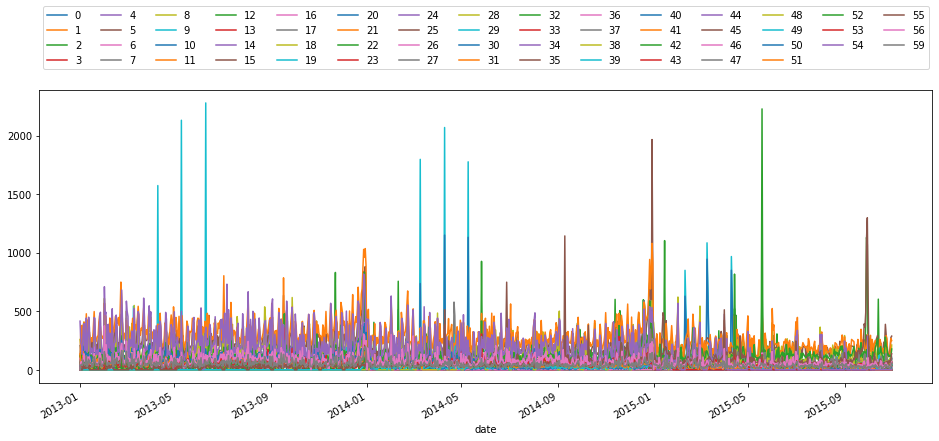

In [70]:
sd_wide=pd.pivot_table(store_daily,index=['date'], columns='shop_id', values='item_cnt_day',
                       aggfunc=np.sum, fill_value=0)
ax=sd_wide.plot(figsize=(16,6))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=15, fancybox=True, shadow=False)